In [2]:
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
import numpy as np
import os
import cv2
from matplotlib import pyplot as plt

In [5]:
file_names = os.listdir("colorful_img/")
imgs = []
for fn in file_names:
    img = cv2.imread("colorful_img/" + fn)
    imgs.append(img)

In [20]:
imgs[0].shape[0]

636

In [21]:
lab_img = cv2.resize(cv2.cvtColor(imgs[0], cv2.COLOR_BGR2LAB), dsize=(100, int(100 * imgs[0].shape[1] / imgs[0].shape[0])), interpolation=cv2.INTER_LINEAR)
# lab_img = cv2.resize(cv2.cvtColor(imgs[0], cv2.COLOR_BGR2LAB), dsize=(0,0), fx=0.25, fy=0.25, interpolation=cv2.INTER_LINEAR)
img_l, img_a, img_b = cv2.split(lab_img)
img_shape = img_l.shape
X = np.array(list(zip(img_l.flatten(), img_a.flatten(), img_b.flatten())))
X.shape

(12500, 3)

In [24]:
clustering = MeanShift(bandwidth=5).fit(X)

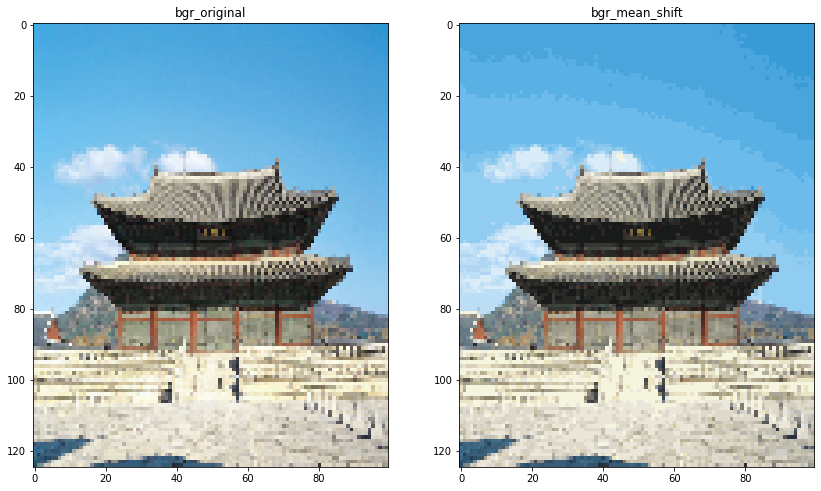

In [25]:
label_cnt = max(list(set(clustering.labels_))) + 1
cluster_points = [[] for i in range(label_cnt)]
for p, l in zip(X, clustering.labels_):
    cluster_points[l].append(p)

clustering.labels_

cluster_means = [np.uint8(sum(np.array(points, np.int32)) / len(points)) for points in cluster_points]

# cluster_result = np.array([cluster_means[l] for l in clustering.labels_]).T
result = np.array([cluster_means[l] for l in clustering.labels_]).T
# .reshape(lab_img.shape)

len(cluster_means), label_cnt

cluster_means[0]

np.uint8(sum(np.array(cluster_points[0])) / len(cluster_points[0]))


lab_img.shape

img_l, img_a, img_b = [r.reshape(img_shape) for r in result]

fig=plt.figure(figsize=(14, 14))
columns = 2
rows = 1
bgr_original = cv2.cvtColor(lab_img, cv2.COLOR_LAB2RGB)
bgr_mean_shift = cv2.cvtColor(cv2.merge((
    img_l, 
    img_a, 
    img_b
)), cv2.COLOR_LAB2RGB)
ax = fig.add_subplot(rows, columns, 1)
ax.title.set_text("bgr_original")
plt.imshow(bgr_original)
ax = fig.add_subplot(rows, columns, 2)
ax.title.set_text("bgr_mean_shift")
plt.imshow(bgr_mean_shift)

In [35]:
def mean_shift_analyze(img, h=10, height=100):
    lab_img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2LAB), dsize=(height, int(height * img.shape[0] / img.shape[1])), interpolation=cv2.INTER_LINEAR)
    img_l, img_a, img_b = cv2.split(lab_img)
    img_shape = img_l.shape
    X = np.array(list(zip(img_l.flatten(), img_a.flatten(), img_b.flatten())))
    clustering = MeanShift(bandwidth=h).fit(X)
    label_cnt = max(list(set(clustering.labels_))) + 1
    cluster_points = [[] for i in range(label_cnt)]
    for p, l in zip(X, clustering.labels_):
        cluster_points[l].append(p)
    cluster_means = [np.uint8(sum(np.array(points, np.int32)) / len(points)) for points in cluster_points]
    result = np.array([cluster_means[l] for l in clustering.labels_]).T
    img_l, img_a, img_b = [r.reshape(img_shape) for r in result]
    fig=plt.figure(figsize=(14, 14))
    columns = 2
    rows = 1
    bgr_original = cv2.cvtColor(lab_img, cv2.COLOR_LAB2RGB)
    bgr_mean_shift = cv2.cvtColor(cv2.merge((
        img_l, 
        img_a, 
        img_b
    )), cv2.COLOR_LAB2RGB)
    ax = fig.add_subplot(rows, columns, 1)
    ax.title.set_text("bgr_original")
    plt.imshow(bgr_original)
    ax = fig.add_subplot(rows, columns, 2)
    ax.title.set_text("bgr_mean_shift - {} clusters".format(label_cnt))
    plt.imshow(bgr_mean_shift)

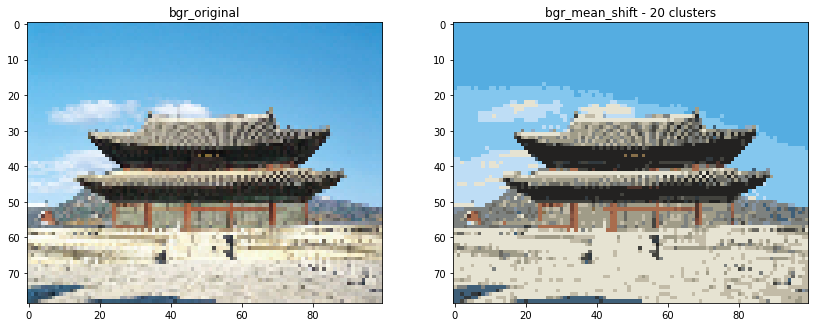

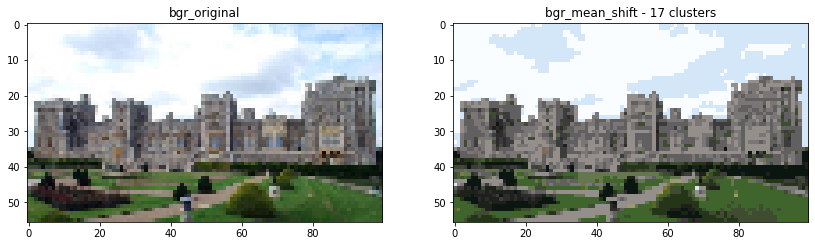

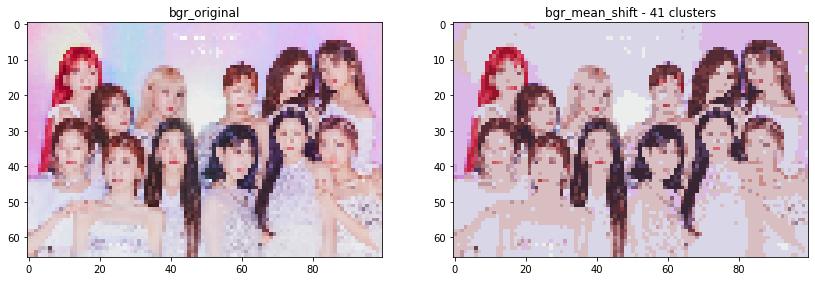

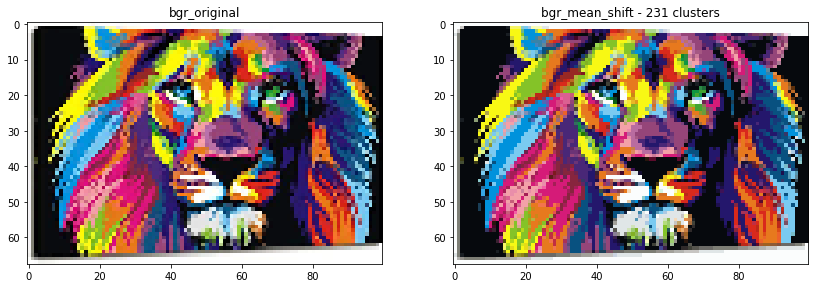

In [34]:
for img in imgs:
    mean_shift_analyze(img, h=10)

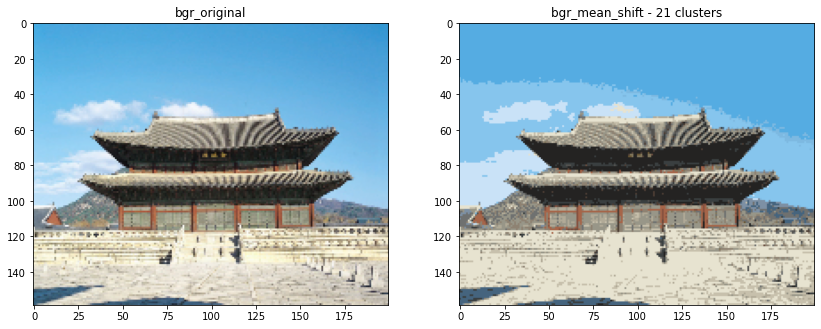

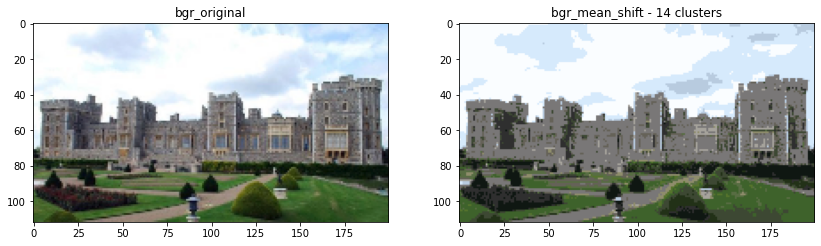

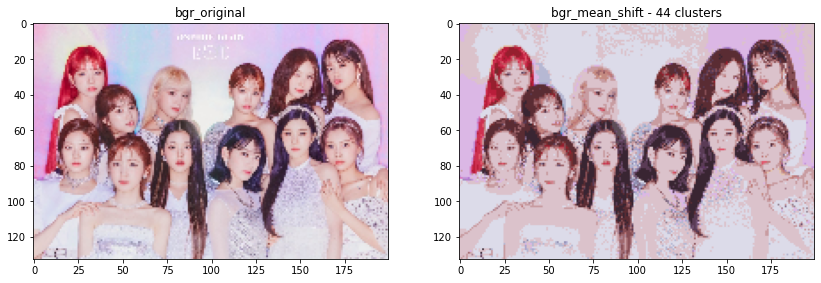

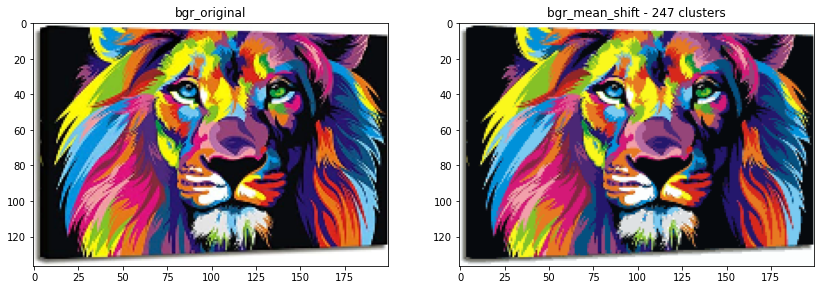

In [36]:
for img in imgs:
    mean_shift_analyze(img, h=10,height=200)

In [22]:
X = np.array([[1, 2], [1, 4], [1, 0], [10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [28]:
kmeans.predict([[0, 0], [12, 3]])
type(kmeans.cluster_centers_)

numpy.ndarray

In [6]:
def kmeans_analyze(img, k, height=200):
    lab_img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2LAB), dsize=(height, int(height * img.shape[0] / img.shape[1])), interpolation=cv2.INTER_LINEAR)
    img_l, img_a, img_b = cv2.split(lab_img)
    img_shape = img_l.shape
    X = np.array(list(zip(img_l.flatten(), img_a.flatten(), img_b.flatten())))
    clustering = KMeans(n_clusters=k, random_state=0).fit(X)
#     clustering = MeanShift(bandwidth=h).fit(X)
    label_cnt = max(list(set(clustering.labels_))) + 1
    cluster_points = [[] for i in range(label_cnt)]
    for p, l in zip(X, clustering.labels_):
        cluster_points[l].append(p)
    cluster_means = [np.uint8(sum(np.array(points, np.int32)) / len(points)) for points in cluster_points]
    result = np.array([cluster_means[l] for l in clustering.labels_]).T
    img_l, img_a, img_b = [r.reshape(img_shape) for r in result]
    fig=plt.figure(figsize=(14, 14))
    columns = 2
    rows = 1
    bgr_original = cv2.cvtColor(lab_img, cv2.COLOR_LAB2RGB)
    bgr_mean_shift = cv2.cvtColor(cv2.merge((
        img_l, 
        img_a, 
        img_b
    )), cv2.COLOR_LAB2RGB)
    ax = fig.add_subplot(rows, columns, 1)
    ax.title.set_text("bgr_original")
    plt.imshow(bgr_original)
    ax = fig.add_subplot(rows, columns, 2)
    ax.title.set_text("bgr_mean_shift - {} clusters".format(label_cnt))
    plt.imshow(bgr_mean_shift)

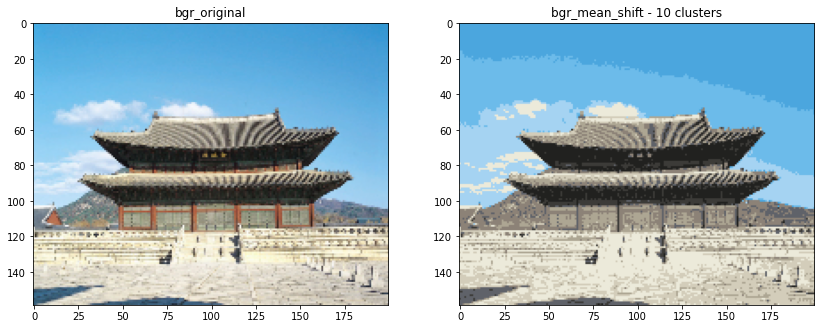

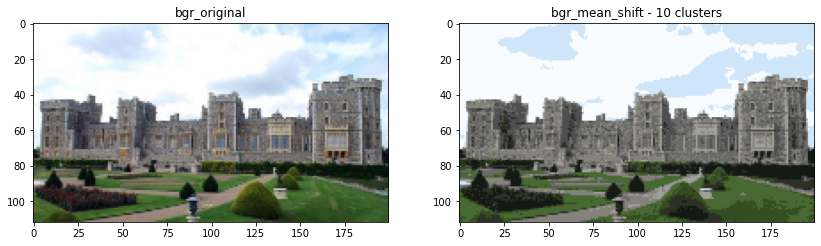

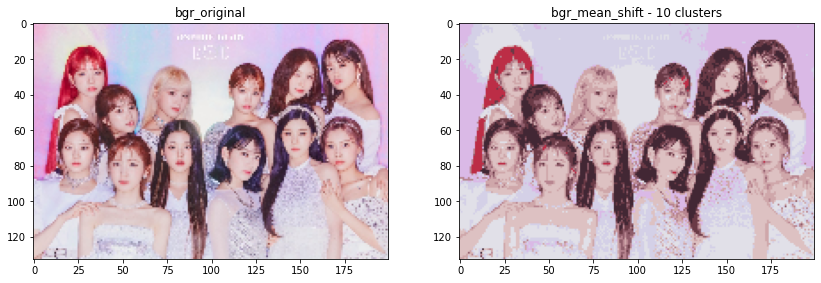

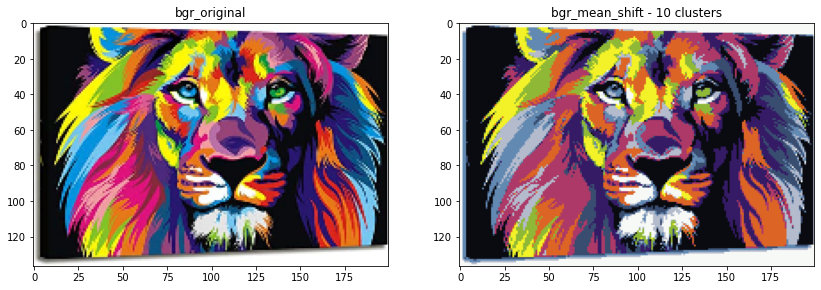

In [7]:
for img in imgs:
    kmeans_analyze(img, k=10,height=200)

In [34]:
def analyze(img, k=10, height=200):
    lab_img = cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2LAB), dsize=(height, int(height * img.shape[0] / img.shape[1])), interpolation=cv2.INTER_LINEAR)
    img_l, img_a, img_b = cv2.split(lab_img)
    img_shape = img_l.shape
    X = np.array(list(zip(img_l.flatten(), img_a.flatten(), img_b.flatten())))
    mean_shift_clustering = MeanShift(bandwidth=k).fit(X)
    label_cnt = max(list(set(mean_shift_clustering.labels_))) + 1
    mean_shift_cluster_points = [[] for i in range(label_cnt)]
    for p, l in zip(X, mean_shift_clustering.labels_):
        mean_shift_cluster_points[l].append(p)
#     mean_shift_cluster_means = [np.uint8(sum(np.array(points, np.int32)) / len(points)) for points in mean_shift_cluster_points]
    mean_shift_result = np.array([np.array(mean_shift_clustering.cluster_centers_[l], np.uint8) for l in mean_shift_clustering.labels_]).T
#     mean_shift_result = np.array([mean_shift_cluster_means[l] for l in mean_shift_clustering.labels_]).T
    img_l, img_a, img_b = [r.reshape(img_shape) for r in mean_shift_result]
    fig=plt.figure(figsize=(14, 14))
    bgr_mean_shift = cv2.cvtColor(cv2.merge((
        img_l, 
        img_a, 
        img_b
    )), cv2.COLOR_LAB2RGB)
    kmeans_clustering = KMeans(n_clusters=label_cnt, random_state=0).fit(X)
    kmeans_cluster_points = [[] for i in range(label_cnt)]
    for p, l in zip(X, kmeans_clustering.labels_):
        kmeans_cluster_points[l].append(p)
#     kmeans_cluster_means = [np.uint8(sum(np.array(points, np.int32)) / len(points)) for points in kmeans_cluster_points]
    kmeans_result = np.array([np.array(kmeans_clustering.cluster_centers_[l], np.uint8) for l in kmeans_clustering.labels_]).T
#     kmeans_result = np.array([kmeans_cluster_means[l] for l in kmeans_clustering.labels_]).T
    img_l, img_a, img_b = [r.reshape(img_shape) for r in kmeans_result]
    fig=plt.figure(figsize=(14, 14))
    columns = 3
    rows = 1
    bgr_original = cv2.cvtColor(lab_img, cv2.COLOR_LAB2RGB)
    bgr_k_means = cv2.cvtColor(cv2.merge((
        img_l, 
        img_a, 
        img_b
    )), cv2.COLOR_LAB2RGB)
    ax = fig.add_subplot(rows, columns, 1)
    ax.title.set_text("bgr_original")
    plt.imshow(bgr_original)
    ax = fig.add_subplot(rows, columns, 2)
    ax.title.set_text("bgr_mean_shift - {} clusters".format(label_cnt))
    plt.imshow(bgr_mean_shift)
    ax = fig.add_subplot(rows, columns, 3)
    ax.title.set_text("bgr_k-means - {} clusters".format(label_cnt))
    plt.imshow(bgr_k_means)

<Figure size 1008x1008 with 0 Axes>

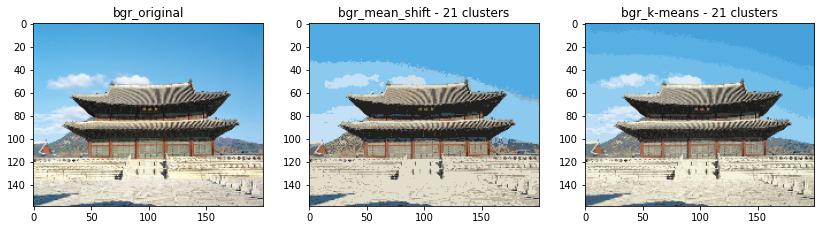

<Figure size 1008x1008 with 0 Axes>

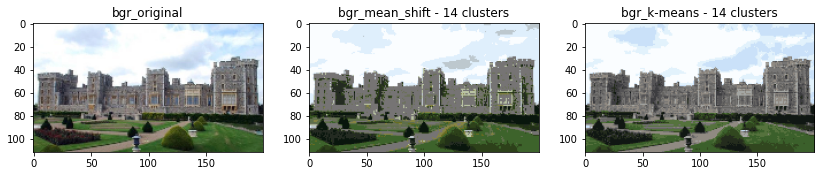

<Figure size 1008x1008 with 0 Axes>

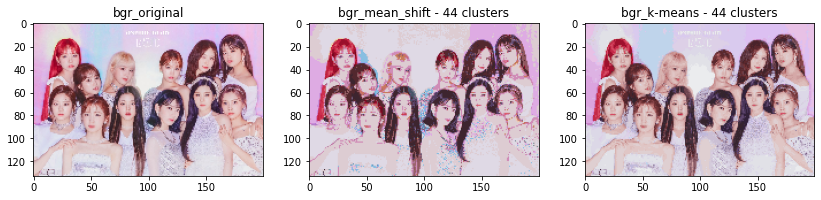

<Figure size 1008x1008 with 0 Axes>

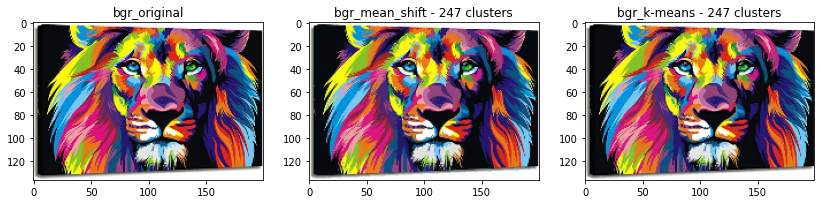

In [37]:
for img in imgs:
    analyze(img, k=10,height=200)

<Figure size 1008x1008 with 0 Axes>

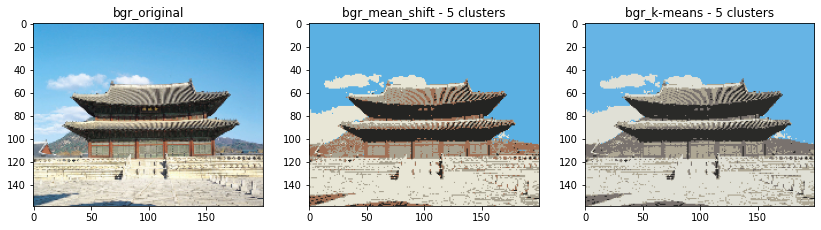

<Figure size 1008x1008 with 0 Axes>

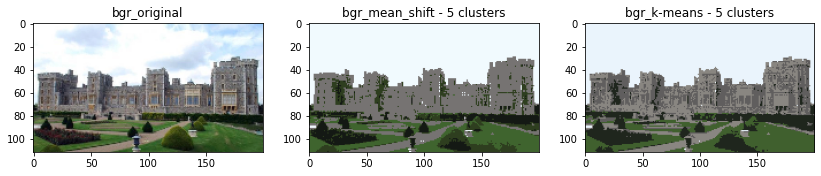

<Figure size 1008x1008 with 0 Axes>

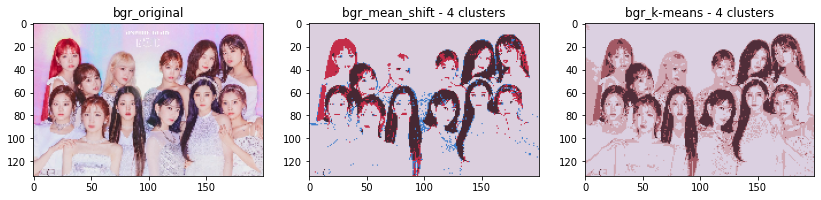

<Figure size 1008x1008 with 0 Axes>

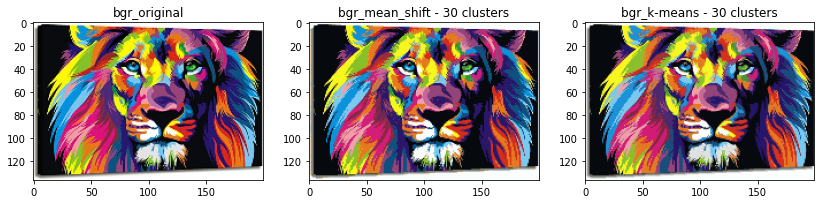

In [38]:
for img in imgs:
    analyze(img, k=20,height=200)

<Figure size 1008x1008 with 0 Axes>

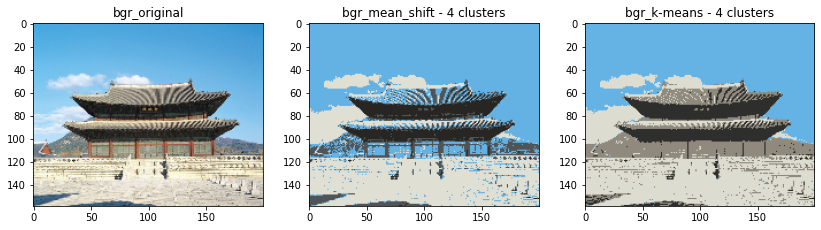

<Figure size 1008x1008 with 0 Axes>

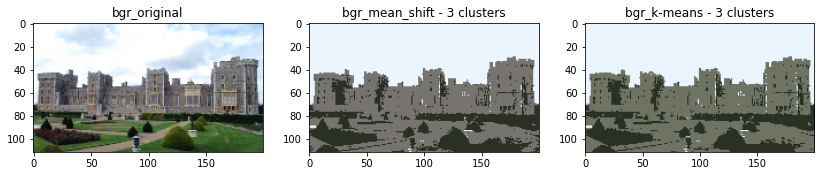

<Figure size 1008x1008 with 0 Axes>

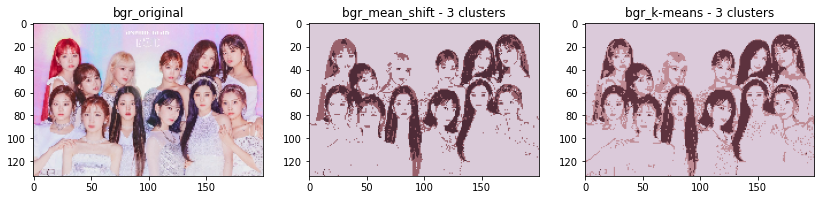

<Figure size 1008x1008 with 0 Axes>

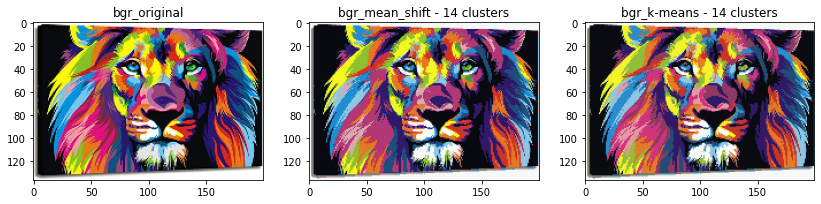

In [39]:
for img in imgs:
    analyze(img, k=30,height=200)

<Figure size 1008x1008 with 0 Axes>

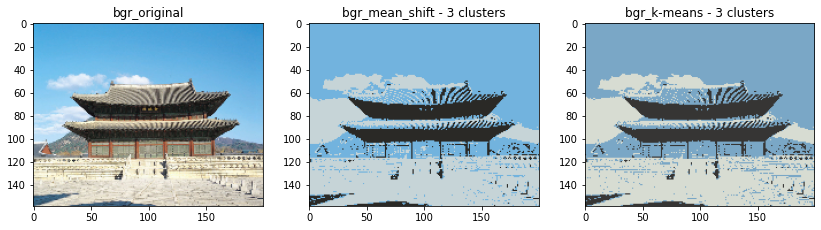

<Figure size 1008x1008 with 0 Axes>

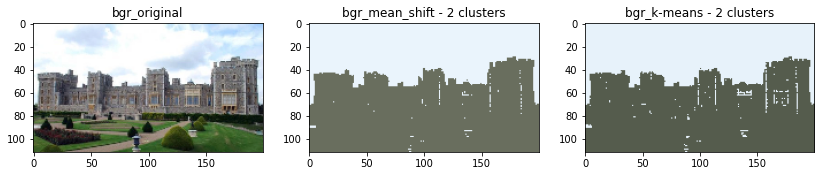

<Figure size 1008x1008 with 0 Axes>

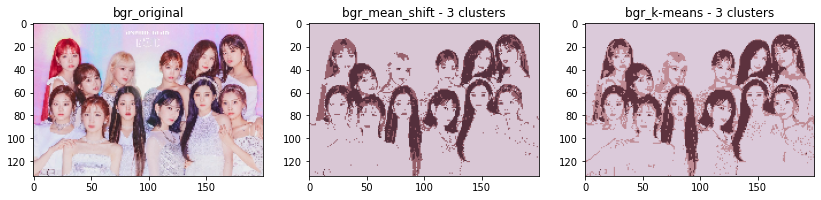

<Figure size 1008x1008 with 0 Axes>

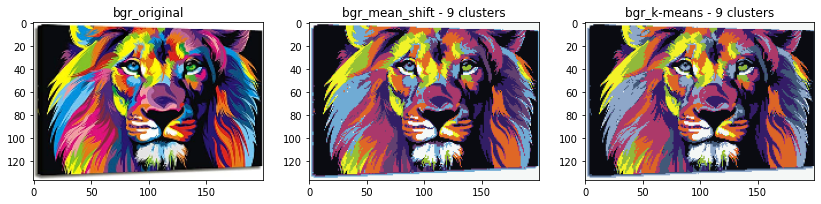

In [40]:
for img in imgs:
    analyze(img, k=40,height=200)

In [41]:
for img in imgs:
    analyze(img, k=10,height=400)

KeyboardInterrupt: 

In [ ]:
for img in imgs:
    analyze(img, k=20,height=400)

In [ ]:
for img in imgs:
    analyze(img, k=30,height=400)

In [ ]:
for img in imgs:
    analyze(img, k=40,height=400)